/Users/jsusser/Desktop/Random code files/image rec/v_data/train/cars/82car.jpg
/Users/jsusser/Desktop/Random code files/image rec/v_data/train/planes/142plane.jpg


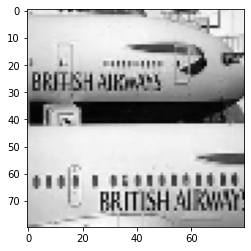

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
import os
path = "/Users/jsusser/Desktop/Random code files/image rec/v_data/train"
for x in ["cars", "planes"]: 
    for p in os.listdir(os.path.join(path,x)):
        print(os.path.join(path,x,p))
        img_array = cv2.imread(os.path.join(path,x,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        plt.imshow(new_img_array,cmap="gray")
        break

In [3]:
X = []
y = []
#convert = lambda category : int(category == 'cars')
def convert(category):
    
    if category =="planes":
        return 0
    else:
        return 1
def create_test_data(path):
    for x in ["cars", "planes"]: 
        for p in os.listdir(os.path.join(path,x)):
            category = x
            category = convert(category)
            img_array = cv2.imread(os.path.join(path,x,p),cv2.IMREAD_GRAYSCALE)
            new_img_array = cv2.resize(img_array, dsize=(80, 80))
            X.append(new_img_array)
            y.append(category)


create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

In [4]:

X = X/255.0
X.shape

(400, 80, 80, 1)

In [71]:
model = Sequential()


# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [72]:
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
10/10 [==============================] - 3s 268ms/step - loss: 0.6265 - accuracy: 0.5906 - val_loss: 0.8614 - val_accuracy: 0.2000
Epoch 2/10
10/10 [==============================] - 3s 270ms/step - loss: 0.4960 - accuracy: 0.7937 - val_loss: 0.8066 - val_accuracy: 0.6000
Epoch 3/10
10/10 [==============================] - 3s 257ms/step - loss: 0.4133 - accuracy: 0.8406 - val_loss: 0.5872 - val_accuracy: 0.9000
Epoch 4/10
10/10 [==============================] - 4s 387ms/step - loss: 0.3446 - accuracy: 0.8687 - val_loss: 0.7809 - val_accuracy: 0.7250
Epoch 5/10
10/10 [==============================] - 3s 290ms/step - loss: 0.2768 - accuracy: 0.8750 - val_loss: 0.8915 - val_accuracy: 0.6750
Epoch 6/10
10/10 [==============================] - 3s 344ms/step - loss: 0.2021 - accuracy: 0.9156 - val_loss: 1.0645 - val_accuracy: 0.6375
Epoch 7/10
10/10 [==============================] - 3s 343ms/step - loss: 0.1553 - accuracy: 0.9531 - val_loss: 0.6525 - val_accuracy: 0.7750
Epoch 

In [76]:
model.save('planes-cars')

INFO:tensorflow:Assets written to: planes-cars/assets


In [2]:
import os
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from tensorflow import keras
import numpy as np
import cv2
model = keras.models.load_model('planes-cars')
img_array = cv2.imread("/Users/jsusser/Desktop/download-7.jpg",cv2.IMREAD_GRAYSCALE)
new_img_array = cv2.resize(img_array, dsize=(80, 80))

X_test = np.array(new_img_array).reshape(-1,80,80,1)
X_test = X_test/255

predictions = model.predict(X_test)

predicted_val = [int(round(p[0])) for p in predictions]

predicted_val

[1]

In [75]:
"plane - 0, car - 1"

'plane - 0, car - 1'